# Pipeline on the preprocessed generic model (after synonyms,..)

In [1]:
import pandas as pd
import numpy as np
import maboss
import shutil
import os
import seaborn as sns
import matplotlib.pyplot as plt
from functions.generate_utils.create_generic_models.update_phenotypes_generic_models import generic_models_update_phenotypes
from functions.analysis_utils.MaBoSS_simulation.maboss_phenotype_patient import compute_phenotype_table_generic

from functions.generate_utils.create_generic_models.update_nodes_names import replace_node_names_in_file


In [2]:

name_montagud_maps = {
        "CASPASE8": "CASP8",
        "CASPASE3": "CASP3",
        "CASPASE9": "CASP9",
        "CYCLINB": "CCNB1",
        "CYCLIND": "CCND1",
        "DSH": "DVL1",
        "BETA_CATENIN": "CTNNB1",
        "E_CADHERIN": "CDH1",
        "CYCC": "CYCS",
        "MEK1_2": "MEK1",
        "NF_KB": "NFKB",
        "SNAIL": "SNAI1",
        "TNFALPHA": "TNF",
        "TSC1_2": "TSC1",
        "BCL_XL": "BCL2L1",
        "MAP3K1_3": "MAP3K1",
        "CHK1_2": "CHK1",
    }

In [3]:
# chose folder where we want all the personalized boolean models and associated results saved 
drug_interest = 'Refametinib' #Pictilisib, 'Avagacestat' AZD8931 
tissue_interest = 'Prostate'
tissue_remove = 'Haematopoietic and Lymphoid'

data_model_folder = 'data/montagud_models'
bnd_original_model = f'{data_model_folder}/Montagud2022_Prostate_Cancer.bnd'
cfg_original_model = f'{data_model_folder}/Montagud2022_Prostate_Cancer.cfg'



In [4]:
folder_model = 'analysis/generic_models'
folder_result = f'{folder_model}/results'

os.makedirs(folder_model, exist_ok=True)
os.makedirs(folder_result, exist_ok=True)


shutil.copy(bnd_original_model, f"{folder_model}/Montagud2022_{tissue_interest}_Cancer.bnd")
shutil.copy(cfg_original_model, f"{folder_model}/Montagud2022_{tissue_interest}_Cancer.cfg")


'analysis/generic_models/Montagud2022_Prostate_Cancer.cfg'

In [5]:
input_nodes = ['EGF', 'FGF', 'TGFB', 'ANDROGEN', 'HYPOXIA', 'NUTRIENTS', 'CARCINOGEN', 'ACIDOSIS', 'TNF', 'SPOP']
phenotypes_interest = [
        "PROLIFERATION",
        "INVASION",
        "DNA_REPAIR",
        "MIGRATION",
        "APOPTOSIS",
    ]

nodes_to_remove = ['FUSED_EVENT', 'AR_ERG']

In [6]:
# pre process the models
cfg_template_path = (
        folder_model + "/Montagud2022_Prostate_Cancer.cfg"
    )
bnd_template_path = (
    folder_model + "/Montagud2022_Prostate_Cancer.bnd"
)
cfg_template_path

'analysis/generic_models/Montagud2022_Prostate_Cancer.cfg'

In [8]:
# pre process the models
cfg_template_path = (
        folder_model + "/Montagud2022_Prostate_Cancer.cfg"
    )
bnd_template_path = (
    folder_model + "/Montagud2022_Prostate_Cancer.bnd"
)



nodes_to_add = {"MEK1": "MEK2", "TSC1": "TSC2", "MAP3K1": "MAP3K3", "CHK1": "CHK2"}


# # --- Pre process the generic model (proteins or genes names) ---
replace_node_names_in_file(cfg_template_path, name_montagud_maps, nodes_to_remove, nodes_to_add)
replace_node_names_in_file(bnd_template_path, name_montagud_maps, nodes_to_remove, nodes_to_add)

change manually the bnd files with the node to remove
change manually the bnd files with the node to remove


In [9]:
# update phenotypes 
generic_models_update_phenotypes(phenotypes_interest, folder_model)

Modified and saved: analysis/generic_models/Montagud2022_Prostate_Cancer.cfg


In [11]:
results_phenotypes = compute_phenotype_table_generic(folder_model,input_nodes,phenotypes_interest, folder_result)


In [12]:
results_phenotypes

,PROLIFERATION,INVASION,DNA_REPAIR,MIGRATION,APOPTOSIS
EGF,0.232,0.158,0.002,0.119179,0.130676
FGF,0.275156,0.149081,0.006,0.048765,0.310744
TGFB,0.146567,0.724873,0.0,0.150948,0.410843
ANDROGEN,0.226,0.158,0.002,0.117179,0.132676
HYPOXIA,0.049131,0.091545,0.0,0.044081,0.090078
NUTRIENTS,0.383216,0.119625,0.0,0.062559,0.09193
CARCINOGEN,0.168661,0.099,0.386754,0.012,0.695798
ACIDOSIS,0.21385,0.118,0.002,0.054945,0.125739
TNF,0.089473,0.940996,0.0,0.340598,0.052
SPOP,0.372394,0.303326,0.002,0.11885,0.069099


Results:
- Generic models show overal less proliferation than the sensitive and resistant groups.
- no stats test possible as only one model

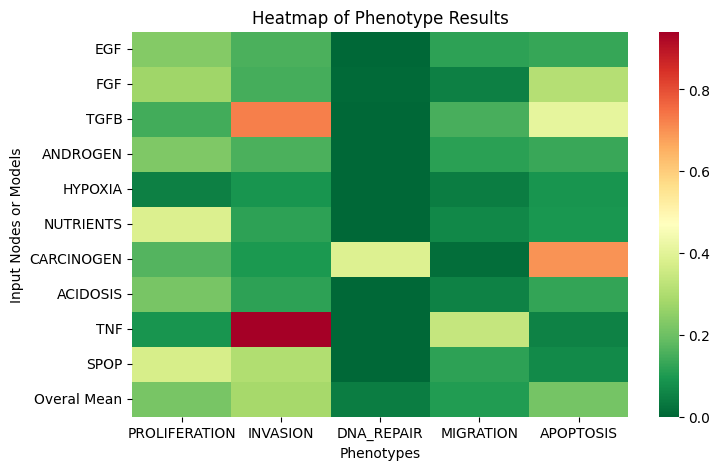

In [13]:
plt.figure(figsize=(8, 5))
results_phenotypes_numeric = results_phenotypes.apply(pd.to_numeric, errors='coerce')
sns.heatmap(results_phenotypes_numeric, annot=False, cmap="RdYlGn_r")
plt.title("Heatmap of Phenotype Results")
plt.xlabel("Phenotypes")
plt.ylabel("Input Nodes or Models")
plt.show()

Results
- TGFB can act as both an oncogene and tumor suppressor
- When Carcinogen is present this increase genome instability and DNA damage (DNA repair is a sensor of DNA damage)